# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je 22. 4. 2024, 23:59:59**, pokud odevzdáte úkol do 29. 4. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Reseni

## Načtení dat

> ##### Naimportuju potřebné baličky

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import Binarizer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

> ##### Načtěme data a podívejme se na ně

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,122,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,75,11,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,106,103,76,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,81,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,157,120,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,9,...,98,6,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(2400, 785)

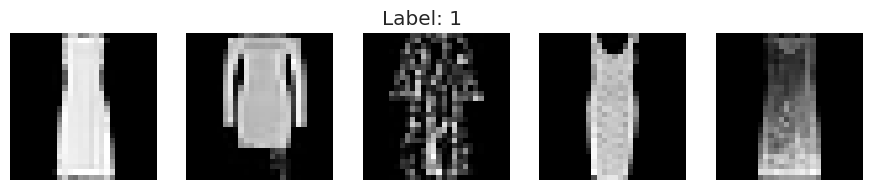

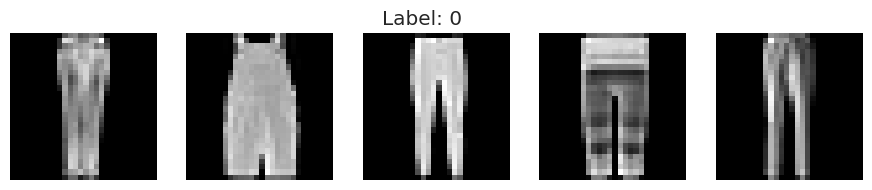

In [5]:
labels = df['label'].unique()

for label in labels:
    images = df[df['label'] == label].iloc[:5, 1:]

    fig, axs = plt.subplots(1, 5, figsize=(11, 2))

    for img, ax in zip(images.values, axs):
        ax.imshow(img.reshape(28, 28), cmap='gray')
        ax.axis('off')

    plt.suptitle(f"Label: {label}")

> ##### Jak je vidět z obrázků, náš dataset je složen z horních a dolních oděvů, kde ***label*** = 0 znamená dolní oděv a ***label*** = 1 znamená horní oděv

In [6]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2400.000000,2400.0,2400.0,2400.0,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.000000,2400.000000,2400.0
mean,0.484167,0.0,0.0,0.0,0.002083,0.098333,0.302500,0.846250,2.256250,6.025000,...,65.379583,26.975417,9.651667,3.307500,1.249167,0.460417,0.11250,0.038750,0.010833,0.0
std,0.499853,0.0,0.0,0.0,0.067682,1.895871,5.014792,9.262155,15.491603,25.358871,...,66.874570,49.060424,30.540885,18.067668,11.443957,6.363199,2.82043,1.742655,0.530723,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.250000,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,1.000000,0.0,0.0,0.0,3.000000,69.000000,188.000000,189.000000,219.000000,243.000000,...,248.000000,252.000000,246.000000,212.000000,179.000000,176.000000,88.00000,85.000000,26.000000,0.0


> ##### Jak je vidět, některé pixely mají vždy hodnotu 0, což znamená, že nenesou žádnou informaci, která by pomohla při klasifikaci obrázků
> ##### Také směrodatná odchylka některých pixelů je poměrně malá, což znamená, že se jejich hodnoty skoro nemění, což také znamená, že nesou jen málo užitečné informace

## Rozdělení dat

In [7]:
Xdata = df.drop("label", axis = 1)
ydata = df["label"]

In [8]:
random_seed = 111
# train = 60% val = 20% test = 20%
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed) 
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=random_seed)

In [9]:
display(df.shape)
display(Xtrain.shape)
display(Xtest.shape)
display(Xval.shape)

(2400, 785)

(1440, 784)

(480, 784)

(480, 784)

## Model *SVM*

💡Metoda podpůrných vektorů (**SVM**) je efektivní algoritmus pro klasifikační úlohy, jako je například rozpoznávání obrazu. Dokáže pracovat s rozsáhlými prostory příznaků, zvládá řídká data a nabízí flexibilitu při výběru jádra. SVM však může být výpočetně nákladná a vyžaduje pečlivé ladění hyperparametrů.

> ##### Hodně algoritmů strojového učení funguje lépe, když jsou všechny příznaky podobného rozsahu. SVM není výjimkou. MinMaxScaler transformuje všechny příznaky tak, aby jejich hodnoty ležely mezi 0 a 1 (v dalších SVM modelech po redukci dimenzionality situace zůstává stejná)

In [10]:
scaler = MinMaxScaler()

scaler.fit(Xtrain)

Xtrain_scaled = scaler.transform(Xtrain)
Xval_scaled = scaler.transform(Xval)
Xtest_scaled = scaler.transform(Xtest)

> ##### Vytvořím mřížku hyperparametrů, které budu ladit

In [11]:
param_grid_linear_rbf = {
    'C': [0.01, 0.1, 1, 5, 10, 20],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Dělám to zvlášť, protože degree potřebuji jen pro poly
param_grid_poly = {
    'C': [0.01, 0.1, 1, 5, 10, 20],
    'kernel': ['poly'],
    'degree': [2, 3, 5, 7, 9],
    'gamma': ['scale', 'auto']
}

param_grid = list(ParameterGrid(param_grid_linear_rbf)) + list(ParameterGrid(param_grid_poly))

> ##### Natrénuju model a určím nejlepší hyperparametry pomocí Accuracy Score

In [12]:
modelSVM = SVC()

results = []
val_accuracies = []

for i, params in enumerate(param_grid):
    modelSVM.set_params(**params)
    
    modelSVM.fit(Xtrain_scaled, ytrain)
    
    ypred_val = modelSVM.predict(Xval_scaled)
    val_accuracy = accuracy_score(yval, ypred_val)
    val_accuracies.append(val_accuracy)
    
    results.append({
        'params': params,
        'val_accuracy': val_accuracy
    })

> ##### Natrénuju SVM s nejlepšími parametry

In [13]:
best_SVM_index = np.argmax(val_accuracies)
best_SVM_params = results[best_SVM_index]['params']
val_accuracy = results[best_SVM_index]['val_accuracy']

print(f"Best SVM Parameters: {best_SVM_params}")
print(f"Validation Accuracy: {val_accuracy}")

best_SVM = SVC(**best_SVM_params)
best_SVM.fit(Xtrain_scaled, ytrain);

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Validation Accuracy: 0.9875


> ##### Přesnost na validačních datech je 0.9875, což je docela dobrý výsledek

## Model *naivní Bayesův klasifikátor*

💡Naivní bayesovský klasifikátor je jednoduchý a rychlý algoritmus, který dobře funguje na velkých souborech dat a může být účinný pro úlohy klasifikace obrázků. Jeho "naivní" předpoklad nezávislosti prvků však nemusí být vždy přesný pro obrazy, kde sousední pixely jsou často korelované.

> ##### **GaussianNB**: Tento model předpokládá, že hodnoty příznaků se řídí normálním (Gaussovým) rozdělením. V kontextu klasifikace obrazu to nemusí být nejlepší předpoklad, protože hodnoty pixelů obrazu mají obvykle nerovnoměrné rozdělení.  
> ##### **MultinomialNB**: Tento model je vhodný pro data, která lze popsat multinomickým rozdělením, což se často vyskytuje v úlohách klasifikace textu. V kontextu obrázků může být užitečný, pokud považujeme obrázek za "text", kde každý pixel je "slovo" ze "slovníku" všech možných hodnot pixelů.  
> ##### **BernoulliNB**: Tento model se hodí pro binární data a může být užitečný, pokud uvažujeme obrázek jako sadu binárních příznaků (např. každý pixel je "přítomnost" nebo "nepřítomnost" určité úrovně jasu).  

In [14]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
print(f"GaussianNB score: {gnb.score(Xval, yval)}")

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
print(f"MultinomialNB score: {mnb.score(Xval, yval)}")

GaussianNB score: 0.4791666666666667
MultinomialNB score: 0.9375


> ##### **BernoulliNB** pracuje s binárními příznaky, zatímco naše příznaky jsou hodnoty jasu pixelů, takže použijeme *Binarizer* a vyzkoušíme všechny různé thresholdy, abychom zjistili, u kterého z nich model funguje nejlépe

In [15]:
# BernoulliNB
best_threshold = 0
best_score = 0

for threshold in range(256):
    binarizer = Binarizer(threshold=threshold)
    
    binarizer.fit(Xtrain)
    Xtrain_bin = binarizer.transform(Xtrain)
    Xval_bin = binarizer.transform(Xval)

    bnb = BernoulliNB()
    bnb.fit(Xtrain_bin, ytrain)
    score = bnb.score(Xval_bin, yval)

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"BernoulliNB score: {best_score}")

Best threshold: 55
BernoulliNB score: 0.95625


 ##### Popis výsledků:  
> ##### **GaussianNB** vykázal nejnižší přesnost ze všech tří modelů. To může být způsobeno tím, že rozdělení hodnot pixelů obrazu se neřídí normálním rozdělením.  
> ##### **MultinomiálníNB** ukazal výrazně lepší přesnost, což může být způsobeno tím, že rozdělení hodnot pixelů lépe odpovídá multinomiálnímu rozdělení.  
> ##### **BernoulliNB** s thresholdem binarizace 55 ukazal nejlepší přesnost. To naznačuje, že převod hodnot pixelů na binární příznaky může být pro tuto úlohu účinným přístupem.

> ##### Také jsem si všiml, že u **GaussianNB** výsledek silně závisí na volbě seedu při rozdělení dat na trénovací, validační a testovací data. To může být způsobeno tím, že různá rozdělení mohou vést k různým rozložením hodnot pixelů v trénovací množině, což následně ovlivňuje parametry modelu

## Model *LDA*

💡Lineární diskriminační analýza (**LDA**) je metoda, která se používá k nalezení lineárního kombinatorického prostoru příznaků, který optimalizuje rozdělení mezi více třídami. V kontextu naší úlohy klasifikace obrázků může být LDA užitečná při hledání "směrů", které nejlépe oddělují obrázky různých tříd.

In [16]:
lda_svd = LDA(solver='svd')
lda_lsqr = LDA(solver='lsqr')

lda_svd.fit(Xtrain, ytrain)
lda_lsqr.fit(Xtrain, ytrain)

score_svd = lda_svd.score(Xval, yval)
score_lsqr = lda_lsqr.score(Xval, yval)

print(f"LDA (SVD) score: {score_svd}")
print(f"LDA (LSQR) score: {score_lsqr}")

LDA (SVD) score: 0.93125
LDA (LSQR) score: 0.9208333333333333


> ##### Celkově oba modely ukázaly poměrně vysokou přesnost

> ##### Nepoužil jsem také solver "eigen", protože způsobuje LinAlgError, když matice, kterou se snaží zpracovat, není pozitivně definitní. To může být způsobeno nedostatečným množstvím dat nebo tím, že data jsou příliš řídká nebo mají vysokou dimenzi.

> ##### Také jsem nepoužil žádný scaler, protože po experimentování s nimi jsem nedosáhl příliš odlišných výsledků (v dalších LDA modelech po redukci dimenzionality situace zůstává stejná)

## Redukce dimenzionality PCA

💡Obrázky mají obvykle vysokou dimenzionalitu, protože každý pixel v obrázku je samostatným příznakem. V našem případě pracujeme se 784 příznaky. To může ztížit trénování modelů a vést k problému prokletí dimenzionality.

PCA tento problém řeší transformací původních příznaků do nového prostoru příznaků s nižší dimenzionalitou. Nové příznaky neboli "hlavní komponenty" jsou vybrány tak, aby maximalizovaly rozptyl dat. 

Použití PCA na obrazová data může pomoci zlepšit účinnost a výkonnost klasifikačních modelů tím, že sníží počet prvků a dobu trénování.

### *PCA + SVM*

> ##### Vytvořím mřížku hyperparametrů, které budu ladit
> ##### Počet komponentů budu probírat na relativně malém seznamu možných variant, protože větší počet variant výrazně prodlužuje dobu ladění modelů

In [17]:
n_components = [10, 20, 30, 50, 80, 100, 125, 150, 175, 200, 250]
param_grid_linear_rbf = {
    'C': [0.01, 0.1, 1, 5, 10, 20],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_poly = {
    'C': [0.01, 0.1, 1, 5, 10, 20],
    'kernel': ['poly'],
    'degree': [2, 3, 5, 7, 9],
    'gamma': ['scale', 'auto']
}
param_grid = list(ParameterGrid(param_grid_linear_rbf)) + list(ParameterGrid(param_grid_poly))

> ##### Natrénuju model a určím nejlepší hyperparametry pomocí Accuracy Score
> ##### Během trénování modelu použiji redukci PCA.

In [18]:
modelSVM = SVC()

results = []
val_accuracies = []

for n in n_components:
    
    pca = PCA(n_components=n)
    Xtrain_pca = pca.fit_transform(Xtrain_scaled)
    Xval_pca = pca.transform(Xval_scaled)

    for i, params in enumerate(param_grid):
        modelSVM.set_params(**params)

        modelSVM.fit(Xtrain_pca, ytrain)

        ypred_val = modelSVM.predict(Xval_pca)
        val_accuracy = accuracy_score(yval, ypred_val)
        val_accuracies.append(val_accuracy)

        results.append({
            'n_components': n,
            'params': params,
            'val_accuracy': val_accuracy
        })

> ##### 👆Při trénování modelu jsem použil data již zpracovaná pomocí MinMaxScaleru, protože s ním model funguje lépe.

> ##### Natrénuju PCA + SVM s nejlepšími parametry

In [19]:
best_index = np.argmax(val_accuracies)
best_n_components = results[best_index]['n_components']
best_params = results[best_index]['params']
val_accuracy = results[best_index]['val_accuracy']

print(f"Best SVM Parameters: {best_params}")
print(f"Best number of PCA components: {best_n_components}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

best_SVM_PCA = SVC(**best_params)
pca = PCA(n_components=best_n_components)
Xtrain_pca = pca.fit_transform(Xtrain_scaled)
best_SVM_PCA.fit(Xtrain_pca, ytrain);

Best SVM Parameters: {'C': 5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best number of PCA components: 30
Validation Accuracy: 0.9917


> ##### Jak je vidět, přesnost na validačních datech je 0.9917, což je velmi dobrý výsledek, a to při použití pouze 30 komponentů.
> ##### Ale na druhou stranu i bez použití PCA měl model SVM přesnost 0.9875, takže se nakonec po použití PCA skoro nic nezměnilo.

### *PCA + naivní Bayesův klasifikátor*

> ##### V kontextu modelu naivního Bayesova klasifikátoru s aplikací PCA můžeme použít pouze GaussianNB, protože po aplikaci PCA získáme spojitá data včetně záporných hodnot, což znemožňuje použití MultinomialNB a BernoulliNB.

In [20]:
n_components = [10, 20, 30, 50, 80, 100, 125, 150, 175, 200, 250]

best_n = 0
best_score = 0

for n in n_components:
    
    pca = PCA(n_components=n)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xval_pca = pca.transform(Xval)

    gnb = GaussianNB()
    gnb.fit(Xtrain_pca, ytrain)
    
    score = gnb.score(Xval_pca, yval)
    
    if score > best_score:
        best_score = score
        best_n = n

print(f"Best number of PCA components: {best_n}")
print(f"Best score: {best_score}")

Best number of PCA components: 30
Best score: 0.9625


> ##### V tomto modelu jsme po PCA opět získali 30 komponentů.
> ##### Zároveň se výrazně zvýšila přesnost modelu ve srovnání s modelem **GaussianNB** bez PCA, což může být způsobeno tím, že transformace dat pomocí PCA může přiblížit rozdělení dat normálnímu, což zlepšuje výkonnost **GaussianNB**

### *PCA + LDA*

In [21]:
n_components = [10, 20, 30, 50, 80, 100, 125, 150, 175, 200, 250]

best_score_svd = 0
best_n_svd = 0

best_score_lsqr = 0
best_n_lsqr = 0

for n in n_components:
   
    pca = PCA(n_components=n)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xval_pca = pca.transform(Xval)

    # svd
    lda_svd = LDA(solver='svd')
    lda_svd.fit(Xtrain_pca, ytrain)
    
    score_svd = lda_svd.score(Xval_pca, yval)
    
    if score_svd > best_score_svd:
        best_score_svd = score_svd
        best_n_svd = n

    # lsqr
    lda_lsqr = LDA(solver='lsqr')
    lda_lsqr.fit(Xtrain_pca, ytrain)
    
    score_lsqr = lda_lsqr.score(Xval_pca, yval)
    
    if score_lsqr > best_score_lsqr:
        best_score_lsqr = score_lsqr
        best_n_lsqr = n

print(f"Best number of PCA components for 'svd' solver: {best_n_svd}")
print(f"Best score for 'svd' solver: {best_score_svd:.4f}")

print(f"Best number of PCA components for 'lsqr' solver: {best_n_lsqr}")
print(f"Best score for 'lsqr' solver: {best_score_lsqr:.4f}")

Best number of PCA components for 'svd' solver: 20
Best score for 'svd' solver: 0.9812
Best number of PCA components for 'lsqr' solver: 20
Best score for 'lsqr' solver: 0.9812


> ##### Zaprvé je vidět, že u obou solverů je výsledek stejný, což může být způsobeno tím, že se snižuje dimenzionalita dat, což může způsobit, že některé rozdíly v datech, které byly viditelné při vyšší dimenzionalitě, se při nižší dimenzionalitě stanou méně patrnými. V důsledku toho mohou oba solvery začít dávat podobnější výsledky.
> ##### Zadruhé, přesnost ve srovnání s variantou bez PCA se u obou solverů zvýšila.

## Redukce dimenzionality LLE

💡Podobně jako PCA, LLE (Locally Linear Embedding) je také technika snižování dimenzionality, která může být užitečná pro zpracování obrazových dat s vysokou dimenzionalitou. Zatímco PCA se zaměřuje na maximalizaci rozptylu dat, LLE se snaží zachovat geometrii blízkých sousedů v původním prostoru příznaků.

LLE funguje tak, že pro každý bod v datasetu identifikuje jeho nejbližší sousedy a poté hledá nízkodimenzionální reprezentaci dat, která nejlépe zachovává tyto lokální vztahy. To může být obzvláště užitečné pro složité struktury, kde je lineární přístup PCA nedostačující.

### *LLE + SVM*

> ##### Vytvořím mřížku hyperparametrů, které budu ladit

In [22]:
n_components = [10, 20, 30, 50, 80, 100, 125, 150, 175, 200, 250]
param_grid_linear_rbf = {
    'C': [0.01, 0.1, 1, 5, 10, 20],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_poly = {
    'C': [0.01, 0.1, 1, 5, 10, 20],
    'kernel': ['poly'],
    'degree': [2, 3, 5, 7, 9],
    'gamma': ['scale', 'auto']
}
param_grid = list(ParameterGrid(param_grid_linear_rbf)) + list(ParameterGrid(param_grid_poly))

> ##### Natrénuju model a určím nejlepší hyperparametry pomocí Accuracy Score
> ##### Během trénování modelu použiji redukci LLE

In [23]:
modelSVM = SVC()

results = []
val_accuracies = []

for n in n_components:
    
    lle = LLE(n_components=n)
    Xtrain_lle = lle.fit_transform(Xtrain_scaled)
    Xval_lle = lle.transform(Xval_scaled)

    for i, params in enumerate(param_grid):
        modelSVM.set_params(**params)

        modelSVM.fit(Xtrain_lle, ytrain)

        ypred_val = modelSVM.predict(Xval_lle)

        val_accuracy = accuracy_score(yval, ypred_val)
        val_accuracies.append(val_accuracy)

        results.append({
            'n_components': n,
            'params': params,
            'val_accuracy': val_accuracy
        })


> ##### Natrénuju LLE + SVM s nejlepšími parametry

In [24]:
best_index = np.argmax(val_accuracies)
best_n_components = results[best_index]['n_components']
best_params = results[best_index]['params']
val_accuracy = results[best_index]['val_accuracy']

print(f"Best SVM Parameters: {best_params}")
print(f"Best number of LLE components: {best_n_components}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

best_SVM_LLE = SVC(**best_params)
lle = LLE(n_components=best_n_components)
Xtrain_lle = lle.fit_transform(Xtrain_scaled)
best_SVM_LLE.fit(Xtrain_lle, ytrain);

Best SVM Parameters: {'C': 20, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best number of LLE components: 50
Validation Accuracy: 0.9833


> ##### Výsledkem je 50 komponentů a přesnost 0,9833, což je docela dobrý výsledek.
> ##### Na druhou stranu se však tento výsledek příliš neliší od běžného modelu SVM a SVM s aplikací PCA.

### *LLE + naivní Bayesův klasifikátor*

> ##### V kontextu modelu naivního Bayesova klasifikátoru s aplikací LLE zase můžeme použít pouze GaussianNB, protože po aplikaci LLE obdobně jako s PCA získáme spojitá data včetně záporných hodnot, což znemožňuje použití MultinomialNB a BernoulliNB.

In [25]:
n_components = [10, 20, 30, 50, 80, 100, 125, 150, 175, 200, 250]

best_score = 0
best_n = 0

for n in n_components:
    
    lle = LLE(n_components=n)
    Xtrain_lle = lle.fit_transform(Xtrain)
    Xval_lle = lle.transform(Xval)

    gnb = GaussianNB()
    gnb.fit(Xtrain_lle, ytrain)
    
    score = gnb.score(Xval_lle, yval)
    
    if score > best_score:
        best_score = score
        best_n = n

print(f"Best number of LLE components: {best_n}")
print(f"Best score: {best_score:.4f}")

Best number of LLE components: 20
Best score: 0.9729


> ##### Získali jsme 20 komponentů a přesnost 0.9729, což je lepší než při použití PCA

### *LLE + LDA*

In [26]:
n_components = [10, 20, 30, 50, 80, 100, 125, 150, 175, 200, 250]

best_score_svd = 0
best_n_svd = 0

best_score_lsqr = 0
best_n_lsqr = 0

for n in n_components:
    lle = LLE(n_components=n)
    Xtrain_lle = lle.fit_transform(Xtrain)
    Xval_lle = lle.transform(Xval)

    # svd
    lda_svd = LDA(solver='svd')
    lda_svd.fit(Xtrain_lle, ytrain)
    
    score_svd = lda_svd.score(Xval_lle, yval)
    
    if score_svd > best_score_svd:
        best_score_svd = score_svd
        best_n_svd = n

    # lsqr
    lda_lsqr = LDA(solver='lsqr')
    lda_lsqr.fit(Xtrain_lle, ytrain)
    
    score_lsqr = lda_lsqr.score(Xval_lle, yval)
    
    if score_lsqr > best_score_lsqr:
        best_score_lsqr = score_lsqr
        best_n_lsqr = n

print(f"Best number of LLE components for 'svd' solver: {best_n_svd}")
print(f"Best score for 'svd' solver: {best_score_svd}")
print(f"Best number of LLE components for 'lsqr' solver: {best_n_lsqr}")
print(f"Best score for 'lsqr' solver: {best_score_lsqr}")

Best number of LLE components for 'svd' solver: 50
Best score for 'svd' solver: 0.975
Best number of LLE components for 'lsqr' solver: 50
Best score for 'lsqr' solver: 0.975


> ##### Výsledek obou solverů je opět stejný a přesnost je přibližně stejná jako při použití PCA.

## Finalní model

> ##### Po porovnání výsledků všech modelů před použitím redukce dimenzionality a po ní jsem se rozhodl použít jako finální model PCA + SVM s 30 komponenty

In [27]:
pca = PCA(n_components=30)
pca.fit(Xtrain_scaled)
Xtest_pca = pca.transform(Xtest_scaled)

ypred_test = best_SVM_PCA.predict(Xtest_pca)

test_accuracy = accuracy_score(ytest, ypred_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9667


Přesnost na datech, která model nikdy neviděl, tj. na testovacích datech, lze odhadnout jako 0.9667, což je dobrý výsledek.

## Evaluace

> ##### Načteme dataset evaluate

In [28]:
df_eval = pd.read_csv("evaluate.csv")

> ##### Odstraním příznak ID

In [29]:
X_eval = df_eval.drop('ID', axis=1)

> ##### Pro normalizaci dat použíju **stejný** Min-max scaler

In [30]:
X_eval_scaled = scaler.transform(X_eval)

> ##### Použíju **stejný** PCA

In [31]:
X_eval_pca = pca.transform(X_eval_scaled)

> ##### Udělám predikci pro dataset evaluate a výsledky uložím do souboru results.csv

In [32]:
ypred_eval = best_SVM_PCA.predict(X_eval_pca)

df_results = pd.DataFrame({
    'ID': df_eval['ID'],
    'label': ypred_eval
})

df_results.to_csv('results.csv', index=False)

### Konec :)